<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.pinclipart.com%2Fpicdir%2Fbig%2F573-5735483_gamestop-logo-png-clipart.png&f=1&nofb=1" alt="Drawing" style="width: 1000px; height: 150px"/>


# Import Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Analysis

In [78]:
# Read in csv as a dataframe

gamestop = pd.read_csv('GME_stock.csv')

In [79]:
# Data head

gamestop.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [80]:
# Let's get some basic information

gamestop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4773 non-null   object 
 1   open_price      4773 non-null   float64
 2   high_price      4773 non-null   float64
 3   low_price       4773 non-null   float64
 4   close_price     4773 non-null   float64
 5   volume          4773 non-null   float64
 6   adjclose_price  4773 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.1+ KB


# Exploratory Questions

In [81]:
# What are the top five highest prices GME hit?

gamestop['high_price'].head(5)

0    483.000000
1    380.000000
2    150.000000
3    159.179993
4     76.760002
Name: high_price, dtype: float64

In [82]:
# What are the lowest five prices of GME?

gamestop['low_price'].head(5)

0    112.250000
1    249.000000
2     80.199997
3     61.130001
4     42.320000
Name: low_price, dtype: float64

In [83]:
# What were the most common closing prices of GME?

gamestop['close_price'].value_counts().head()

20.049999    7
19.400000    7
7.700000     7
9.750000     7
8.750000     7
Name: close_price, dtype: int64

In [84]:
# Let's create some more columns so the data is easier to understand

In [85]:
# What the data currently looks like

gamestop.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [86]:
# Let's create date columns

gamestop['date_stamp'] = pd.to_datetime(gamestop['date'])
gamestop['year'] = gamestop['date_stamp'].apply(lambda date: date.year)
gamestop['month'] = gamestop['date_stamp'].apply(lambda date: date.month)
gamestop['day'] = gamestop['date_stamp'].apply(lambda date: date.day)
gamestop['day_of_week'] = gamestop['date_stamp'].apply(lambda date: date.dayofweek)

In [87]:
# Now what the data looks like

gamestop.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,date_stamp,year,month,day,day_of_week
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,2021-01-28,2021,1,28,3
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,2021-01-27,2021,1,27,2
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,2021-01-26,2021,1,26,1
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,2021-01-25,2021,1,25,0
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,2021-01-22,2021,1,22,4


In [88]:
# Let's replace 'day_of_week' with name of day of week

days_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
gamestop['day_of_week'] = gamestop['day_of_week'].map(days_map)
gamestop.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,date_stamp,year,month,day,day_of_week
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,2021-01-28,2021,1,28,Thur
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,2021-01-27,2021,1,27,Wed
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,2021-01-26,2021,1,26,Tue
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,2021-01-25,2021,1,25,Mon
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,2021-01-22,2021,1,22,Fri


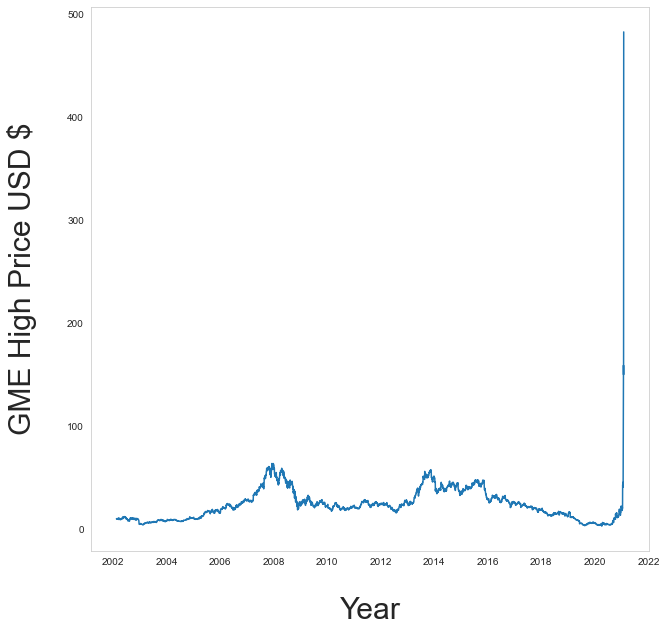

In [89]:
# Let's plot GME by year and high_price

plt.figure(figsize=(10, 10))
plt.plot(gamestop['date_stamp'], gamestop['high_price'])
plt.xlabel('Year',fontsize=30, labelpad = 30)
plt.ylabel('GME High Price USD $',fontsize=30, labelpad = 30)
plt.rc('axes', labelsize=5000)
plt.grid(False)
plt.show()

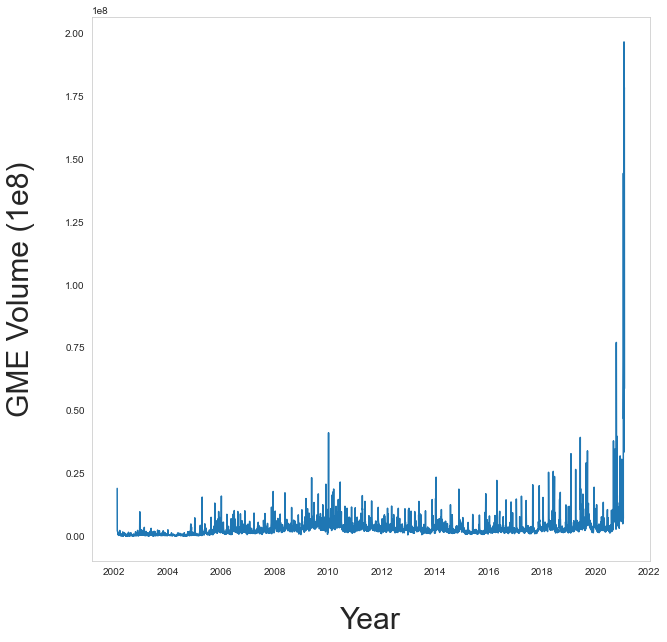

In [90]:
# Let's plot GME by year and Volume

plt.figure(figsize=(10, 10))
plt.plot(gamestop['date_stamp'], gamestop['volume'])
plt.xlabel('Year',fontsize=30, labelpad = 30)
plt.ylabel('GME Volume (1e8)',fontsize=30, labelpad = 30)
plt.rc('axes', labelsize=5000)
plt.grid(False)
plt.show()

In [91]:
# Let's create a 'price_change' column

gamestop['price_change'] = abs(gamestop['close_price'] - gamestop['open_price'])
gamestop.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,date_stamp,year,month,day,day_of_week,price_change
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,2021-01-28,2021,1,28,Thur,71.399994
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,2021-01-27,2021,1,27,Wed,7.319977
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,2021-01-26,2021,1,26,Tue,59.419998
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,2021-01-25,2021,1,25,Mon,19.940002
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,2021-01-22,2021,1,22,Fri,22.420002


In [92]:
# What was the largest change in a trading day?

gamestop['price_change'].max()

71.3999938964844

In [93]:
# What was the lowest change in a trading day?

gamestop['price_change'].min()

0.0

In [94]:
# Let's create a 'pcnt_change' column

gamestop['pcnt_change'] = abs(gamestop['close_price'] - gamestop['open_price'])/gamestop['open_price']
gamestop.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,date_stamp,year,month,day,day_of_week,price_change,pcnt_change
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,2021-01-28,2021,1,28,Thur,71.399994,0.269434
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,2021-01-27,2021,1,27,Wed,7.319977,0.020630
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,2021-01-26,2021,1,26,Tue,59.419998,0.670958
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,2021-01-25,2021,1,25,Mon,19.940002,0.206141
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,2021-01-22,2021,1,22,Fri,22.420002,0.526415


In [95]:
# On what date was GME's biggest change?

In [96]:
max_price_change = gamestop['price_change'].max()

gamestop[gamestop['price_change'] == max_price_change]

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,date_stamp,year,month,day,day_of_week,price_change,pcnt_change
0,2021-01-28,265.0,483.0,112.25,193.600006,58815800.0,193.600006,2021-01-28,2021,1,28,Thur,71.399994,0.269434


In [97]:
# What was the highest percent change in one day? When was it?

gamestop['pcnt_change'].max()

0.670957540729734

In [98]:
# When was the largest change shown above?

gamestop[gamestop['pcnt_change'] == 0.670957540729734]

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,date_stamp,year,month,day,day_of_week,price_change,pcnt_change
2,2021-01-26,88.559998,150.0,80.199997,147.979996,178588000.0,147.979996,2021-01-26,2021,1,26,Tue,59.419998,0.670958


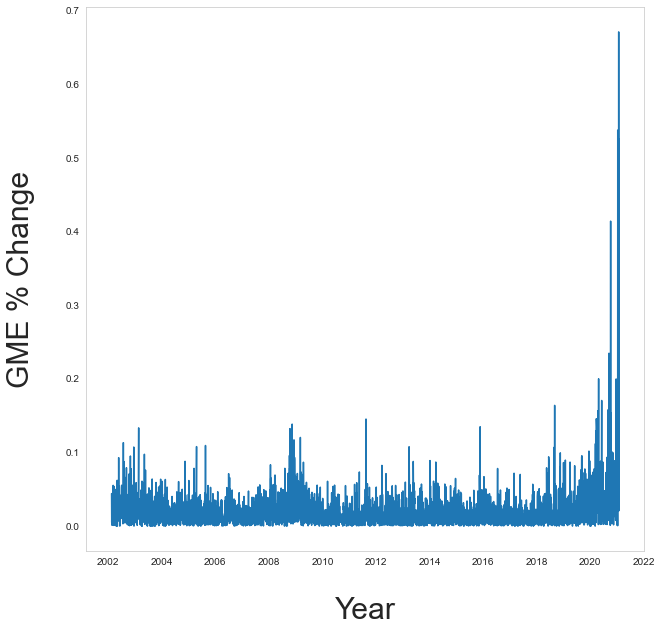

In [99]:
# Let's plot year and percent change 

plt.figure(figsize=(10, 10))
plt.plot(gamestop['date_stamp'], gamestop['pcnt_change'])
plt.xlabel('Year',fontsize=30, labelpad = 30)
plt.ylabel('GME % Change',fontsize=30, labelpad = 30)
plt.rc('axes', labelsize=5000)
plt.grid(False)
plt.show()

In [100]:
# What day of the week is the most volatile on average?

by_day = gamestop.groupby('day_of_week').mean().reset_index()
by_day[by_day['pcnt_change'] == by_day['pcnt_change'].max()]

,day_of_week,open_price,high_price,low_price,close_price,volume,adjclose_price,year,month,day,price_change,pcnt_change
3,Tue,23.041394,23.515347,22.605649,23.103407,3.403110e+06,16.815322,2011.093973,6.539326,15.774259,0.486793,0.020361


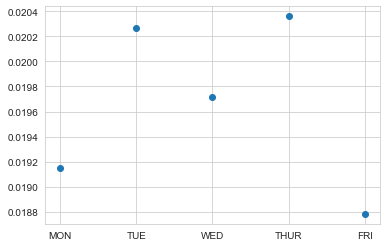

In [101]:
# Let's plot the average volatility by day of week

import matplotlib.pyplot as plt
days_of_week = ['MON', 'TUE', 'WED', 'THUR', 'FRI']
values = by_day['pcnt_change']
plt.scatter(days_of_week,values)
plt.show()

# The End